In [54]:
from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
    drive.mount('/content/gdrive')
    print('Google Drive is mounted\n')
else:
    print('Google Drive is already mounted\n')
  

Google Drive is already mounted



In [0]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import IPython
import os
import numpy as np
from sklearn.preprocessing import normalize
%matplotlib inline

In [56]:
# 데이터 로드

base_path = './sample_data/'
files = os.listdir('sample_data')

#base_path = 'content/gdrive/My Drive/data/'
#files = os.listdir('gdrive')
files = ['zero.wav', 'one.wav', 'two.wav', 'three.wav', 'four.wav', 'five.wav', 'six.wav', 'seven.wav', 'eight.wav', 'nine.wav']

# { "zero.wav": {"sample_rate": 8000, "samples": [...]},
#   "one.wav": {"sample_rate": 8000, "samples": [...]},
#   ...
#   "nine.wav": {"sample_rate": 8000, "samples": [...]}}
sample_dict = {f: {'sample_rate': wavfile.read(base_path + f)[0], 'samples': wavfile.read(base_path + f)[1]} for f in files}

print("data load complete")

data load complete


In [90]:
#정규화1 : 가장 큰값을 가지는 수로 전체를 나누어 줌

#공백 리스트
normal_file = list()

#sample_dict를 복사함
normaldict=dict(sample_dict)

for i in files:
  x_n = sample_dict[i]['samples']
  
  print("원래의 데이터")
  print(x_n)
  
  #기존 데이터의 길이
  length = len(x_n)
  
  temp_absmax = 0
  temp_max = 0
  temp_min = 0
  
  #처음부터 끝가지 반복문을 돌며 최대값을 찾아줌
  for j in range(0,length):
    
    #최대값이 양수일때
    temp_max = maximum(sample_dict[i]['samples'][j],temp_max)
    
    #최대값이 음수일때
    temp_min = minimum(sample_dict[i]['samples'][j],temp_min)
    
    #최대 양수 최소 음수의 절대값을 비교하여 가장큰 절대값을 찾아줌
    temp_absmax = maximum(temp_max, abs(temp_min))
  
  #반복문을 돌며 가장큰 절대값으로 나누어주며 list에 추가
  for j in range(0,length):
    normal_file.append(sample_dict[i]['samples'][j]/ temp_absmax)
  
  print()
  print("정규화된 데이터")
  print(normal_file)
  print()
  
  #normaldict에 업데이트
  normaldict.update({i:{'sample_rate':8000, 'samples':normal_file}})
  
  #리스트 초기화
  normal_file = list()

  #값이 들어갔는지 확인
  print(normaldict)


원래의 데이터
[  -5  126   65 ... -172  -78  -21]

정규화된 데이터
[-0.0006074596039363382, 0.015307982019195723, 0.007896974851172398, 0.0024298384157453528, 0.014214554732110314, 0.009719353662981411, 0.006682055643299721, 0.010812780950066821, 0.010934272870854089, 0.021018102296197303, 0.029887012513667842, 0.021625561900133643, 0.0021868545741708175, 0.03620459239460576, 0.017373344672579272, 0.008625926375896003, 0.01603693354391933, 0.005102660673065241, 0.025999271048475277, 0.03912039849350018, 0.034260721662009476, 0.056979710849228524, 0.06341878265095371, 0.05673672700765399, 0.06001700886891022, 0.03608310047381849, 0.027821649860284292, 0.013364111286599442, -0.02320495687036812, -0.03851293888956384, -0.052363017859312355, -0.06973636253189162, -0.05989551694812295, -0.07702587777912769, -0.06815696756165715, -0.04227918843396914, -0.03620459239460576, -0.01445753857368485, 0.01956019924675009, 0.03207386708783866, 0.06475519377961365, 0.06536265338354999, 0.05673672700765399, 0.0653

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




정규화된 데이터
[0.02967498822421102, 0.0365049458313707, 0.0341497880357984, 0.03297220913801225, 0.0341497880357984, 0.03367875647668394, 0.031323598681111633, 0.0287329251059821, 0.027319830428638718, 0.025200188412623645, 0.025200188412623645, 0.022609514837494113, 0.017899199246349504, 0.017428167687235045, 0.018605746585021198, 0.016721620348563355, 0.019547809703250117, 0.022845030617051343, 0.024729156853509186, 0.02943947244465379, 0.03273669335845502, 0.027319830428638718, 0.02119642016015073, 0.01436646255299105, 0.0030617051342439945, -0.011540273198304286, -0.025906735751295335, -0.04215732454074423, -0.05581723975506359, -0.0628827131417805, -0.06570890249646727, -0.0645313235986811, -0.05581723975506359, -0.04875176636834668, -0.04286387187941592, -0.036975977390485165, -0.03626943005181347, -0.0365049458313707, -0.037682524729156855, -0.03532736693358455, -0.030617051342439944, -0.022609514837494113, -0.015073009891662742, -0.008949599623174752, -0.0023551577955723034, 0.0002

In [92]:
  #정규화2 : sklearn의 nomalize 함수 이용

#공백 리스트 생성
normal_file=list()

#반복문을 통해 리스트에 정규화된 값을 넣어줌
for i in files:
  x_n = sample_dict[i]['samples']  
  x_n=x_n.reshape(1,-1)  
  x_n=normalize(x_n)  
  normal_file.append(x_n)


#normalize_dict 에 기존 sample_dict 과 동일한 값을 넣어줌
normalize_dict= dict(sample_dict)

#값이 들어갔는지 확인
print(normalize_dict)

#연산을 위한 testdict 생성
testdict = dict(normalize_dict)

#반복문을 통해 'samples' 값을 정규화된 값으로 update
testdict.update({f:{'sample_rate':8000, 'samples':normal_file[files.index(f)]} for f in files})

#값이 들어갔는지 확인
print(testdict)



{'zero.wav': {'sample_rate': 8000, 'samples': array([  -5,  126,   65, ..., -172,  -78,  -21], dtype=int16)}, 'one.wav': {'sample_rate': 8000, 'samples': array([ -25,   19,   75, ..., -190, -162, -127], dtype=int16)}, 'two.wav': {'sample_rate': 8000, 'samples': array([-21, -46, -64, ...,  20,   6, -16], dtype=int16)}, 'three.wav': {'sample_rate': 8000, 'samples': array([-117,  -98, -116, ..., -135,  -91,  -99], dtype=int16)}, 'four.wav': {'sample_rate': 8000, 'samples': array([-183,  -76, -142, ...,   22,   27,   27], dtype=int16)}, 'five.wav': {'sample_rate': 8000, 'samples': array([ 35,  -3, -44, ..., -15,  -2, -15], dtype=int16)}, 'six.wav': {'sample_rate': 8000, 'samples': array([ -85,  -66,  -55, ...,  -84, -106,  -80], dtype=int16)}, 'seven.wav': {'sample_rate': 8000, 'samples': array([ 331,  241,  188, ...,  -46,  -81, -140], dtype=int16)}, 'eight.wav': {'sample_rate': 8000, 'samples': array([317, 368, 393, ...,  14,   5, -71], dtype=int16)}, 'nine.wav': {'sample_rate': 8000, 's

In [102]:
print(sample_dict['zero.wav'])
print(normaldict['zero.wav'])

{'sample_rate': 8000, 'samples': array([  -5,  126,   65, ..., -172,  -78,  -21], dtype=int16)}
{'sample_rate': 8000, 'samples': [-0.0006074596039363382, 0.015307982019195723, 0.007896974851172398, 0.0024298384157453528, 0.014214554732110314, 0.009719353662981411, 0.006682055643299721, 0.010812780950066821, 0.010934272870854089, 0.021018102296197303, 0.029887012513667842, 0.021625561900133643, 0.0021868545741708175, 0.03620459239460576, 0.017373344672579272, 0.008625926375896003, 0.01603693354391933, 0.005102660673065241, 0.025999271048475277, 0.03912039849350018, 0.034260721662009476, 0.056979710849228524, 0.06341878265095371, 0.05673672700765399, 0.06001700886891022, 0.03608310047381849, 0.027821649860284292, 0.013364111286599442, -0.02320495687036812, -0.03851293888956384, -0.052363017859312355, -0.06973636253189162, -0.05989551694812295, -0.07702587777912769, -0.06815696756165715, -0.04227918843396914, -0.03620459239460576, -0.01445753857368485, 0.01956019924675009, 0.0320738670878

'\n시간과 주파수를 보여주는 그림.\n소리에서 중요한 것: 주파수와 에너지 (주파수가 굉장히 중요함), Spectro gram에서 에너지가 어디에 분포되었는지에 따라 색상이 다름.\n노란색으로 갈수록 에너지가 많음, 검은색일수록 에너지가 적음.\n발생할 때 다양한 주파수가 포함이 되어있는데 에너지량을 통해 구분할 수 있다. 주파수를 분석할 때 중요하다.\n'

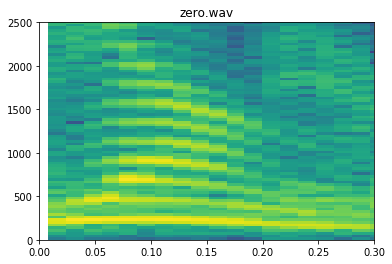

In [101]:
# zero.wav 음성 데이터의 spectrogram
sample_frequency, signalData = wavfile.read('sample_data/zero.wav')
plt.specgram(signalData[:], Fs=sample_frequency)

#정규화 된 데이터로 테스트

#plt.specgram(testdict['zero.wav']['samples'], Fs=sample_frequency)  #실패

#plt.specgram(normaldict['zero.wav']['samples'], Fs=sample_frequency) #성공

plt.axis([0, 0.3, 0, 2500])
plt.title('zero.wav')
#one.wav 음성 데이터의 spectrogram
'''
sample_frequency, signalData = wavfile.read('sample_data/one.wav')
plt.specgram(signalData[:], Fs=sample_frequency)
plt.axis([0, 0.355, 0, 4000])
plt.title('one.wav')
'''
'''
시간과 주파수를 보여주는 그림.
소리에서 중요한 것: 주파수와 에너지 (주파수가 굉장히 중요함), Spectro gram에서 에너지가 어디에 분포되었는지에 따라 색상이 다름.
노란색으로 갈수록 에너지가 많음, 검은색일수록 에너지가 적음.
발생할 때 다양한 주파수가 포함이 되어있는데 에너지량을 통해 구분할 수 있다. 주파수를 분석할 때 중요하다.
'''

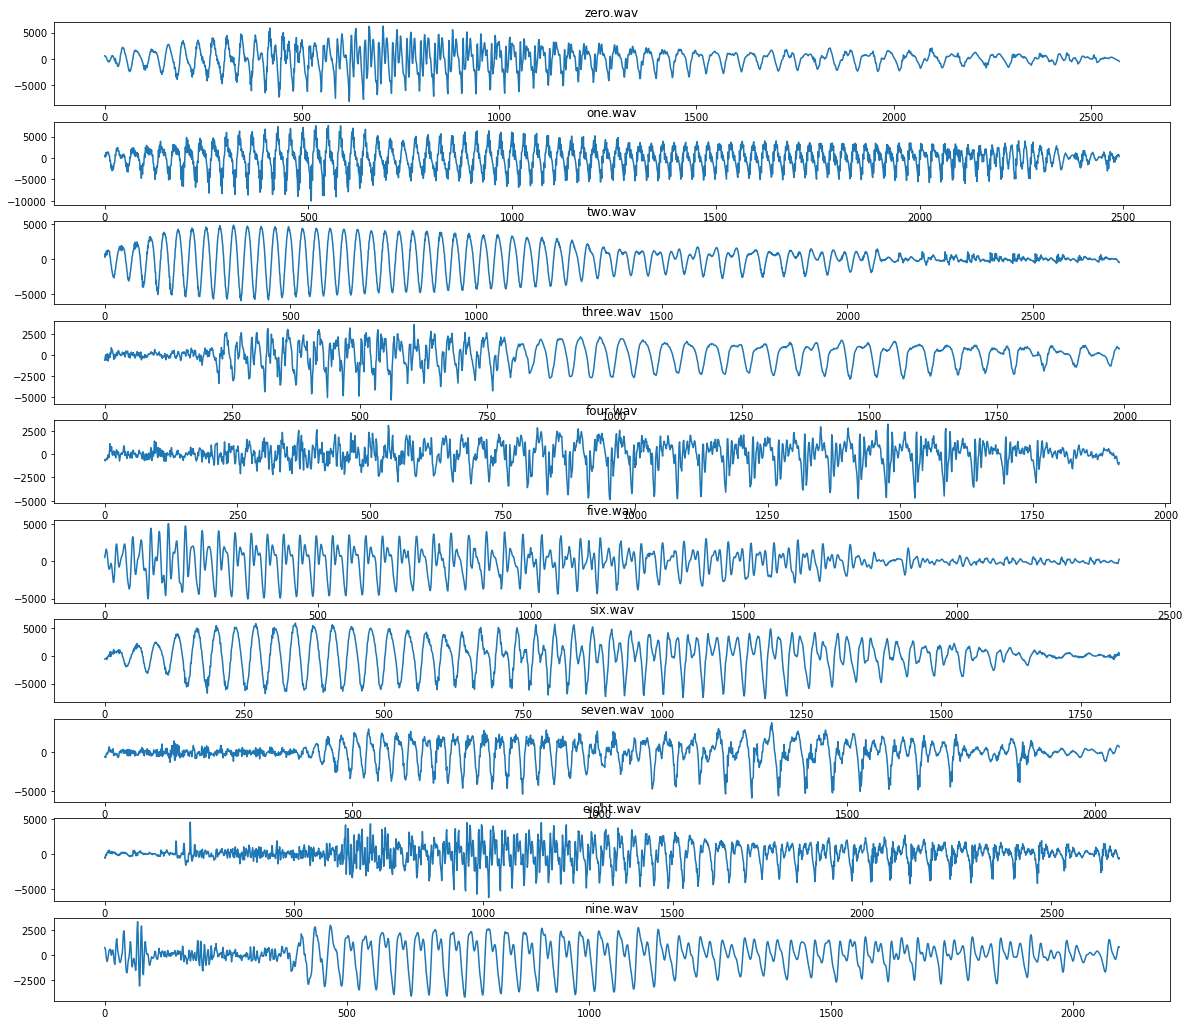

In [0]:
plt.figure(figsize=(20,18))

thre = 500          # 임계값
cutted_samples = list()      # 잘려진 샘플을 저장할 리스트 
for i, (file_name, value) in enumerate(sample_dict.items()):
    
    plt.subplot(10, 1, i + 1)
    
    start = 0
    end = 0
    for i, s in enumerate(value['samples']):
        if abs(s) > thre:
            start = i
            break

    for i, s in enumerate(np.flip(value['samples'])):
        if abs(s) > thre:
            end = i
            break
                 
    a = value['samples'][start:-end-1]   
    cutted_samples.append(a)
    
    plt.plot(a)
    plt.title(file_name)

In [0]:

# 영
IPython.display.Audio(data=cutted_samples[0], rate=8000)


In [0]:
# 일
IPython.display.Audio(data=cutted_samples[1], rate=8000)



In [0]:
#이
IPython.display.Audio(data=cutted_samples[2], rate=8000)


In [0]:
# 삼
IPython.display.Audio(data=cutted_samples[3], rate=8000)


In [0]:
# 사
IPython.display.Audio(data=cutted_samples[4], rate=8000)


In [0]:
# 오
IPython.display.Audio(data=cutted_samples[5], rate=8000)


In [0]:
# 육
IPython.display.Audio(data=cutted_samples[6], rate=8000)


In [0]:

# 칠
IPython.display.Audio(data=cutted_samples[7], rate=8000)

In [0]:
# 팔
IPython.display.Audio(data=cutted_samples[8], rate=8000)


In [0]:
# 구
IPython.display.Audio(data=cutted_samples[9], rate=8000)


In [0]:
#2와 5에서 잡음

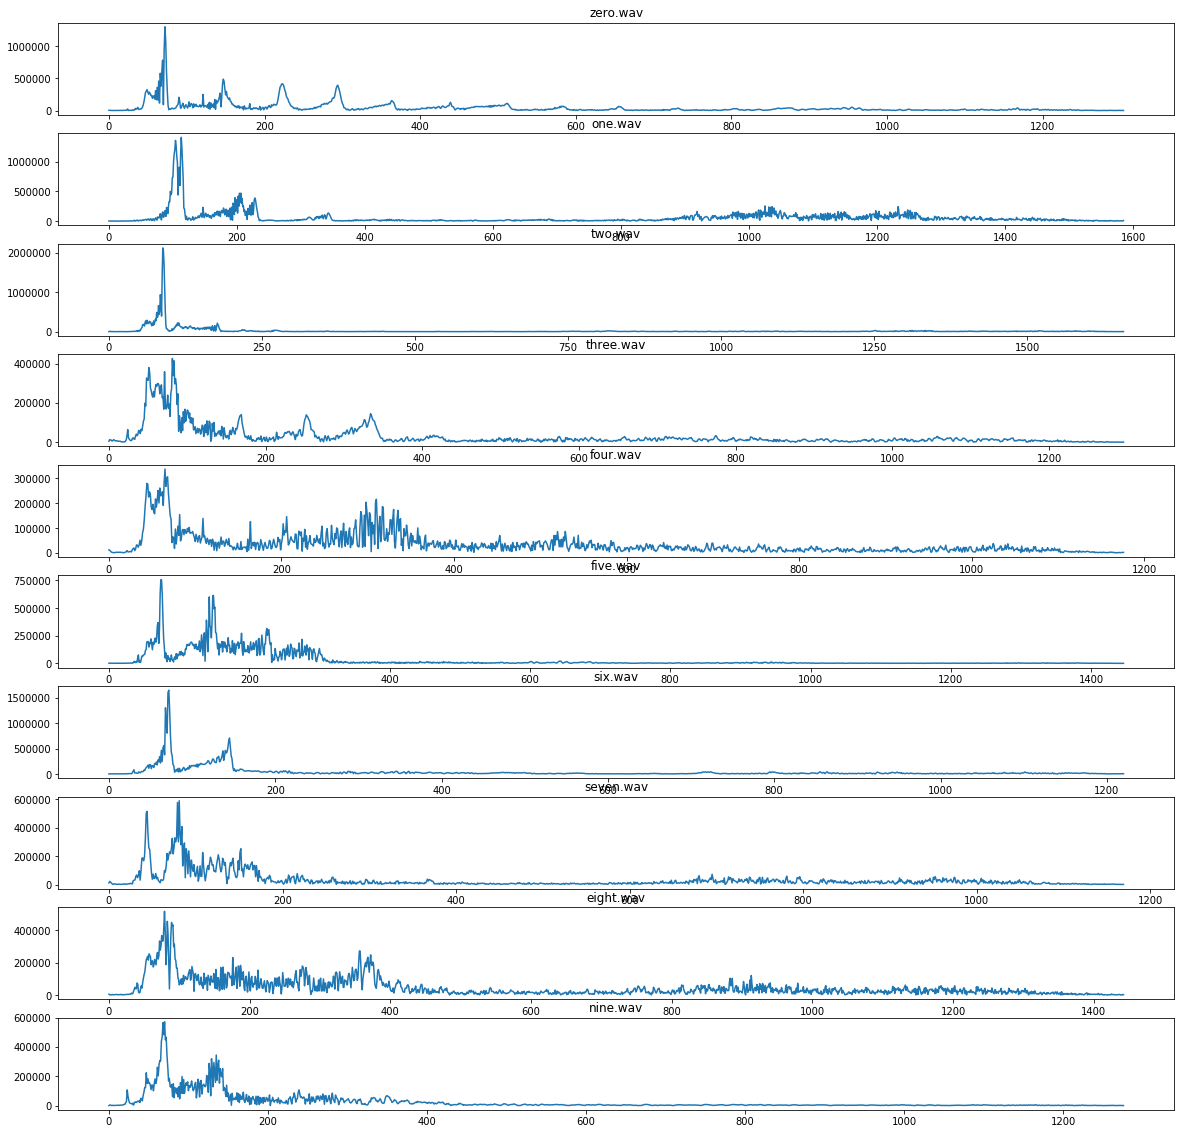

In [104]:
# fft (scipy)
from scipy.fftpack import fft, ifft

plt.figure(figsize=(20, 20))
for i, (file_name, value) in enumerate(sample_dict.items()):
    
    plt.subplot(10, 1, i + 1)
    a = fft(value['samples'])
    plt.plot(abs(a[:len(a)//2]))
    plt.title(file_name)

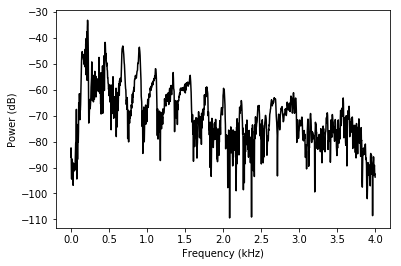

In [0]:
#fft

'''
음성 등의 파형을 기본 주파수(기본음)와 그 정배수의 각 주파수(각 배음)로 분해하는 것. 
간단하게 말하면 어떤 파(波) 중에서 어느 주파수 성분이 얼마만큼 포함되어 있는지를 계산하는 방법. 
모든 파형은 이 푸리에 변환을 통해 기본파와 고주파의 합으로 나타낼 수 있다. 
따라서 하나의 파형이 이어지면 그 파형이 어떤 주파수 성분으로 구성되어 있는지를 이 푸리에 변환을 통해 알 수 있다.

또 기본파나 고조파도 파형으로서는 정현파(正弦波)이기 때문에 아무리 복잡한 파형이라도 각각의 주파수의 정현파 합성을 통해 만들어지는 것을 푸리에 변환이 나타내고 있다. 
결국 기본파와 고조파의 주파수 및 진폭을 알 수 있다면, 이것을 합성해서 하나의 파형으로 나타낼 수도 있다. 이것을 역푸리에 변환 또는 푸리에 합성이라고 한다.



'''

from pylab import*


def waveFeature(wfile):
    sampFreq, snd = wavfile.read(wfile)
    snd = snd / (2.**15)
    '''k=snd.shape
    timeArray = arange(0, k[0], 1)
    timeArray = timeArray / sampFreq
    timeArray = timeArray * 1000  #scale to milliseconds'''
    n = len(snd) 
    p = fft(snd) # take the fourier transform 
    
    nUniquePts = int(ceil((n+1)/2.0))
    p = p[0:nUniquePts]
    p = abs(p)
    p = p / float(n) # scale by the number of points so that
                 # the magnitude does not depend on the length 
                 # of the signal or on its sampling frequency  
    p = p**2  # square it to get the power 

    # multiply by two (see technical document for details)
    # odd nfft excludes Nyquist point
    if n % 2 > 0: # we've got odd number of points fft
        p[1:len(p)] = p[1:len(p)] * 2
    else:
        p[1:len(p) -1] = p[1:len(p) - 1] * 2 # we've got even number of points fft

    freqArray = arange(0, nUniquePts, 1.0) * (sampFreq / n)
    freqArray = freqArray / 1000
    p=10*log10(p)
    return freqArray, p

freqArray, p=waveFeature('sample_data/zero.wav')
plot(freqArray, p, color='k')
xlabel('Frequency (kHz)')
ylabel('Power (dB)')
plt.show()


NameError: ignored

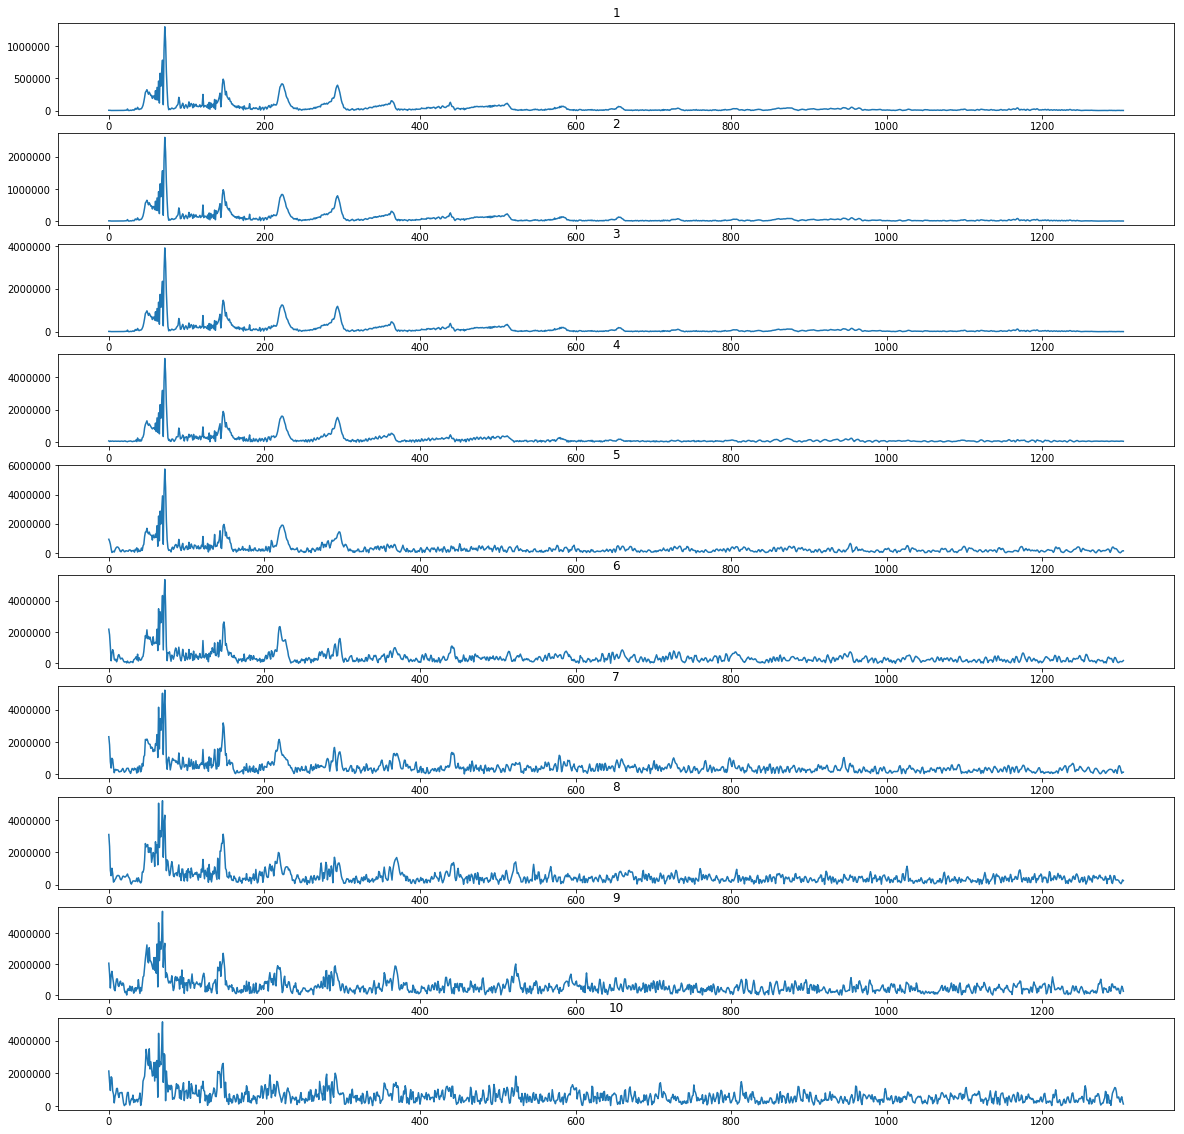

In [0]:

plt.figure(figsize=(20, 20))
for i in range(10):
    
    plt.subplot(10, 1, i + 1)
    a = fft(sample_dict['zero.wav']['samples'] * (i + 1))
    plt.plot(abs(a[:len(a)//2]))
    plt.title(i + 1)